In [2]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.linear_model import LinearRegression

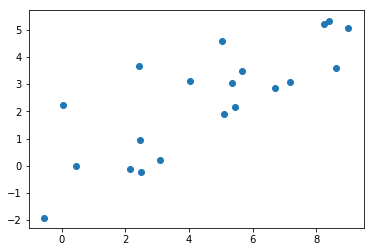

In [3]:
X_train = np.linspace(0,10,20)+np.random.randn(20)
y_train = np.linspace(0,5,20)+np.random.randn(20)
plt.scatter(X_train,y_train)

In [4]:
lr = LinearRegression()

In [7]:
lr.fit(X_train.reshape(-1,1),y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [8]:
X_test = np.linspace(-1,11,20)
y_ = lr.predict(X_test.reshape(-1,1))

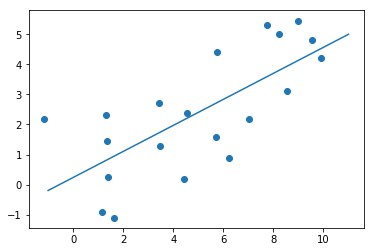

In [10]:
plt.scatter(X_train,y_train)
plt.plot(X_test,y_)

In [11]:
w = lr.coef_  # 斜率

In [12]:
b = lr.intercept_ # 截距

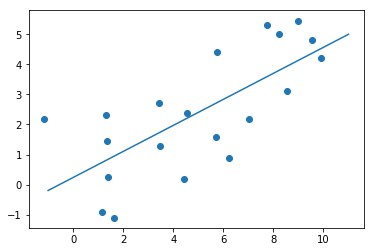

In [14]:
plt.scatter(X_train,y_train)
plt.plot(X_test,w*X_test+b)

In [ ]:
# tensorflow 使用梯度下降 寻找损失函数最小的地方

In [ ]:
# 找一个 Y = W*X + b

In [ ]:
# 损失函数 累加(Y-Y_pred)^2

In [31]:
t = tf.constant([1,2,3,4])

In [33]:
rs = tf.reduce_sum(t)
with tf.Session() as sess:
    print(sess.run(rs))

10


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.linear_model import LinearRegression

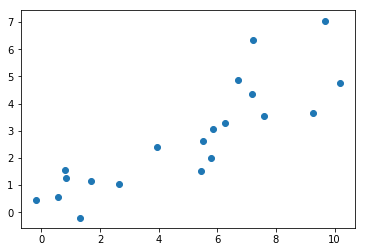

In [3]:
X_train = np.linspace(0,10,20)+np.random.randn(20)
y_train = np.linspace(0,5,20)+np.random.randn(20)
plt.scatter(X_train,y_train)

In [ ]:
# 最小二乘法 累加 (y真实-y预测)^2
# 累加 (y真实-y预测)^2   这个值 越大 说明 偏差越大 偏差越大越不好 所以我们管这个函数叫做损失函数
# 损失函数越小越好

In [4]:
X = tf.placeholder(dtype=tf.float64)  # 占位置 将来传入 X_train
y = tf.placeholder(dtype=tf.float64)  # 占位置 将来传入 y_train
w= tf.Variable(initial_value=np.random.randn(1)[0],dtype=tf.float64)  # 变量 被其他函数调节
b = tf.Variable(initial_value=np.random.randn(1)[0],dtype=tf.float64)  # 变量 被其他函数调节

In [5]:
y_ = w*X+b

In [10]:
a = tf.constant([1,2,3,4])  # 10
rs = tf.reduce_sum(a)
with tf.Session() as sess:
    print(sess.run(rs))

10


In [6]:
cost = tf.reduce_sum(tf.pow((y - y_),2))
learning_rate = 0.001
# 让损失函数最小  梯度下降优化
optimizer = tf.train.GradientDescentOptimizer(learning_rate=learning_rate).minimize(cost)

In [7]:
epoch = 5000  # 最大运行次数
init = tf.global_variables_initializer()
with tf.Session() as sess:
    sess.run(init)
    for i in range(epoch):
        for j,k in zip(X_train,y_train):
            sess.run(optimizer,feed_dict={X:j,y:k})
        if(i%50==0):
            w_ = sess.run(w)
            intercept_ = sess.run(b)
            loss_ = sess.run(cost,feed_dict={X:X_train,y:y_train})
            print('执行%d次-斜率是%f-截距是%f-损失是%f'%(i,w_,intercept_,loss_))

执行0次-斜率是0.244623-截距是0.317275-损失是66.337408
执行50次-斜率是0.542601-截距是0.287551-损失是21.213544
执行100次-斜率是0.548057-截距是0.244752-损失是21.156457
执行150次-斜率是0.551108-截距是0.220818-损失是21.134231
执行200次-斜率是0.552814-截距是0.207435-损失是21.124835
执行250次-斜率是0.553768-截距是0.199951-损失是21.120529
执行300次-斜率是0.554301-截距是0.195766-损失是21.118417
执行350次-斜率是0.554600-截距是0.193426-损失是21.117329
执行400次-斜率是0.554767-截距是0.192118-损失是21.116750
执行450次-斜率是0.554860-截距是0.191386-损失是21.116435
执行500次-斜率是0.554912-截距是0.190977-损失是21.116261
执行550次-斜率是0.554941-截距是0.190748-损失是21.116165
执行600次-斜率是0.554958-截距是0.190620-损失是21.116112
执行650次-斜率是0.554967-截距是0.190548-损失是21.116082
执行700次-斜率是0.554972-截距是0.190508-损失是21.116066
执行750次-斜率是0.554975-截距是0.190486-损失是21.116056
执行800次-斜率是0.554976-截距是0.190473-损失是21.116051
执行850次-斜率是0.554977-截距是0.190466-损失是21.116048
执行900次-斜率是0.554978-截距是0.190462-损失是21.116047
执行950次-斜率是0.554978-截距是0.190460-损失是21.116046
执行1000次-斜率是0.554978-截距是0.190459-损失是21.116045
执行1050次-斜率是0.554978-截距是0.190458-损失是21.116045
执行1100次-斜率是0.554978-截距是0.190458-损

In [ ]:
# 执行3250次-斜率是0.573679-截距是0.168552-损失是0.153258

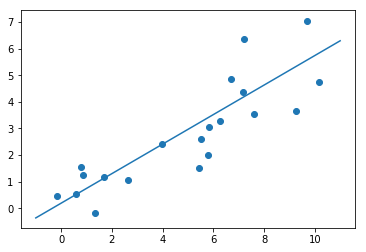

In [9]:
plt.scatter(X_train,y_train)
X_test = np.linspace(-1,11,20)
plt.plot(X_test,0.554978*X_test+0.190457)